<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/5%EC%9E%A5%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 05 장 로지스틱 회귀 / 06 장

05장 로지스틱 회귀 logistic regression는 '참', '거짓'을 구분하는 과정이며 이 부분은 이전에 했던 'Deep Learning for Scratch' [스터디](https://github.com/tirals88/Deep-Learning-from-Scratch/blob/06a51972011ef6082c252b0a5c9b96c9f0cd382b/1%EA%B6%8C_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_+_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(3%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B9%8C%EC%A7%80).ipynb)와 같이 보았다.

활성화 함수의 한 종류로서 계단 함수는 임계치를 기준으로 참과 거짓을 나눈다.</br>그리고 활성화 함수의 또 다른 예시로 시그모이드 Sigmoid 함수가 있다.

이 둘의 차이로는 **'매끄러움'**이 있다. 시그모이드 함수는 연속적인 값을 출력하여 미분에 용이하다.

또 다른 예시로 ReLU 함수는 임계치를 넘으면 그대로 출력을 하고, 넘지 못하면 0을 출력한다.


시그모이드 함수는 $$y = \frac{1}{1+e^{-(ax+b)}}$$ 로 표현될 수 있으며 결국 선형 회귀와 마찬가지로 $a 와 b$를 최적화 하는 것이다.

기울기 $a$는 시그모이드 함수의 경사를, $b$는 함수의 좌우 이동에 관여한다.

시그모이드 함수의 $a$에 대한 변화량(편미분)은 $log{x}$ 의 꼴을, 오차는 반대로 $-log{x}$의 꼴을 보인다.

그리고 오차의 $b$에 대한 변화량은 이차곡선 꼴을 보인다.

정답은 1과 0 두 가지가 있을 수 있고, 정답이 1일 때, 예측 값이 0에 가까워지면 오차가 커지게 된다.</br>이러한 성질을 가지고 있는 함수가 로그이며 정답이 1일 때와 0일 때의 오차를 아래의 식으로 동시에 표현할 수 있다.

$$-(y_{data}log{h} + (1-y_{data})log(1-h))$$

정답이 1일 때 두 번째 항의 값이 0이 되고 반대로 0일 때는 첫 번째 항의 값이 0이 되어 없어진다.

$h$에는 시그모이드 함수가 들어가며, 시그모이드 함수의 편미분은 아래와 같다.

$$\frac{\partial y}{\partial a} = -\frac{-xe^{-(ax+b)}}{(1 + e^{-(ax+b)})^2} = \frac{x}{1+e^{-(ax+b)}}(1-\frac{1}{1+e^{-(ax+b)}}) = x(sig(ax+b))(1-sig(ax+b))$$

$$\frac{\partial y}{\partial b} = -\frac{-e^{-(ax+b)}}{(1 + e^{-(ax+b)})^2} = \frac{1}{1+e^{-(ax+b)}}(1-\frac{1}{1+e^{-(ax+b)}}) = (sig(ax+b))(1-sig(ax+b))$$

04장 다중선형회귀에서는 오차의 값이 양수와 음수가 섞여 있기 때문에 부호를 없애고자 **평균제곱오차**를 사용하였다.</br>그렇지만 지금의 오차는 항상 0보다 크기 때문에 이전의 방법을 사용할 필요가 없다. 다시 말해 본래의 값을 그대로 써도 된다.

$$평균 오차 error = -\frac{1}{n}\sum(y_{data}log{h} + (1-y_{data})log(1-h))$$

이제 평균오차차의 $a$에 대한 편미분식을 구해해본다.
</br>
- $$\frac{\partial error}{\partial a} =-\frac{1}{n}\sum(y_{data}\frac{1}{h}\frac{\partial h}{\partial a} + (1-y_{data})\frac{-1}{1-h}\frac{\partial h}{\partial a}) $$

- $$= -\frac{1}{n}\sum(y_{data}\frac{1}{sig(ax+b)}x(sig(ax+b))(1-sig(ax+b)) + (1-y_{data})\frac{-1}{1-sig(ax+b)}x(sig(ax+b))(1-sig(ax+b))$$

- $$= -\frac{x}{n}\sum(y_{data}(1-sig(ax+b)) - (1-y_{data})(sig(ax+b))$$

- $$= -\frac{x}{n}\sum(y_{data}-sig(ax+b))$$

- $$= \frac{x}{n}\sum(sig(ax+b)-y_{data})$$

위와 같은 방식으로 $b$에 대한 편미분식은 다음과 같다.

- $$\frac{\partial error}{\partial b} =\frac{1}{n}\sum(sig(ax+b)-y_{data})$$

이제 코드로 옮겨놓으면 다음과 같다.

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


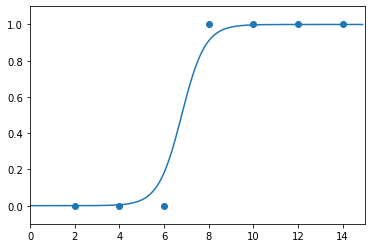

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#공부 시간 X / 합격 여부 Y 데이터 array 만들기
#np.linspace(a, b, t) : [a, b] 에서 균등한 간격으로 t 개의 수로 만들어진 numpy array return
x = np.linspace(2, 14, 7) # x = [ 2.  4.  6.  8. 10. 12. 14.]
y = np.array([0]*3 + [1]*4)

x_data = np.reshape(x, (7, 1)) # x = [[2.], [4.], ... , [14.]]
y_data = np.reshape(y, (7, 1))
data = np.concatenate((x_data, y_data), axis = 1) # data = [[2. 0.], [4. 0.], ... , [14. 1.]]

#기울기 a 와 절편 b 초기화
(a, b) = (0, 0)

#학습률
lr = 0.05

#시그모이드 함수 정의
#sigmoid(a, b, x)로 정의하여 사용할 수 있지만 식이 길지 않아 단일 변수로 정의의
def sigmoid(x):
  return 1/(1+np.e**(-x))

#경사 하강법 실행
#1,000번 반복 마다 각 x 에 대한 현재 a, b 출력

x_range = (np.arange(0, 15, 0.1))

for i in range(2001):
  y_arr = np.empty((1, len(x_range)))
  for x, y in data:
    b_diff = (sigmoid(a*x + b) - y)
    a_diff = x * b_diff

    a -= lr*a_diff
    b -= lr*b_diff

    if i%1000 == 0:
      print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
      if [x, y] == [2, 0]:
        sig = np.array([sigmoid(a * x + b) for x in x_range])
        sig = np.reshape((sig), (1, len(sig)))
        np.append(sig, y_arr, axis=0)
      #앞서 구한 기울기와 절편으로 그래프 그리기
      #plt.scatter(x, y)
      #plt.xlim(0, 15)
      #plt.ylim(-.1, 1.1)
      #x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x 값의 범위 정하기

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
for i in range(len(y_arr)):
  plt.plot(x_range, y_arr[i])
  #print(len(y_arr))
plt.show()

#하고 싶었던 것 : 학습 이후 변화하는 그래프를 한 눈에 보고자 중첩하여 plot 하고 싶음음

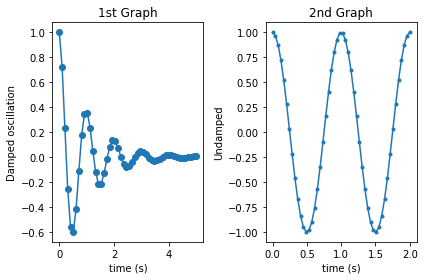

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.xlabel('time (s)')
plt.ylabel('Damped oscillation')

plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.show()